# **Product Notebook**

# *Cleaning and Aggregation*

Importing libraries and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import pyecharts.options as opts
from pyecharts.charts import Calendar, Page, Tab
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

Import datasets

In [2]:
person1 = pd.read_csv("Data/Raw data/person1-step-data.csv")
person2 = pd.read_csv("Data/Raw data/person2-step-data.csv")


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

# Person 1

## Pre Observation
- Pre obvservation to understand the data a bit more

Show the first 5 lines of the person 1 dataset - this will show the layout and columns of the dataset for more understanding.

In [3]:
person1.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
0,Person1 iPhone SE,2014-12-07,8,13
1,Person1 iPhone SE,2014-12-07,8,13
2,Person1 iPhone SE,2014-12-07,8,1
3,Person1 iPhone SE,2014-12-07,8,9
4,Person1 iPhone SE,2014-12-07,8,15


**Exploratory analysis:** Scatter plot - pre observation on the relationship between 'Hour' and 'Count'.

<AxesSubplot:xlabel='Hour', ylabel='Count'>

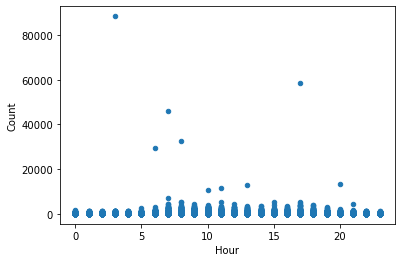

In [4]:
person1.plot.scatter(x = "Hour", y = "Count")


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

The scatterplot aboves shows various outliers which will have to be dealt with during data cleaning.

## Dealing with Outliers
- Hourly values over 10 000 will be assumed an error and be transformed.

Checking the largest recorded values for person 1.

In [5]:
person1.nlargest(10, 'Count')


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
115549,Person1 iPhone SE,2018-11-08,3,88359
115412,Person1 iPhone SE,2018-10-29,17,58659
115387,Person1 iPhone SE,2018-10-05,7,45992
115402,Person1 iPhone SE,2018-10-22,8,32727
115398,Person1 iPhone SE,2018-10-16,6,29653
115404,Person1 iPhone SE,2018-10-25,20,13469
115410,Person1 iPhone SE,2018-10-28,13,12761
115378,Person1 iPhone SE,2018-10-01,11,11806
115392,Person1 iPhone SE,2018-10-13,10,10716
116478,Person1 Misfit,2018-12-27,7,7138


The above output shows 9 recordings with a count of over 10 000. 

We have decided to cap the maximum hourly step count limit at 10 000 steps.

- Health line puts the average running speed of a man between 20-40yrs running a 5km run at 5.9mph (9.5km/h). 
    - <https://www.healthline.com/health/how-fast-can-a-human-run#speed-comparison>


- The calculator site puts 10 000 steps in a 6mile run at 6mph. 
    - <https://www.thecalculatorsite.com/health/steps-miles.php>

Any recording over 10 000 made into a count of 0 as it is assumed to be a device error.

In [6]:
# Changing any values over 10 000 to 0
person1.loc[(person1.Count > 10000),"Count"] = 0  

# Re-checking the largest recorded values
person1.nlargest(10, 'Count')   


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
116478,Person1 Misfit,2018-12-27,7,7138
117072,Person1 Misfit,2019-01-12,17,5472
98583,Person1 Mi Fit,2016-03-13,15,5288
120477,Person1 Misfit,2019-04-24,8,5274
117554,Person1 Misfit,2019-01-28,11,5214
117672,Person1 Misfit,2019-02-01,8,5198
119922,Person1 Misfit,2019-04-07,17,4686
116156,Person1 Misfit,2018-12-07,12,4532
119925,Person1 Misfit,2019-04-07,21,4432
117673,Person1 Misfit,2019-02-01,9,4412


The above output shows that there are no longer any values over 10 000.

## Dealing with multiple sources

Identify different data sources and see how many values in each one.

In [7]:
person1["Source"].value_counts()

# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

Person1 iPhone SE      132843
Person1 Health Mate     26848
Person1 Apple Watch     20000
Person1 Misfit           3404
Person1 Mi Fit            692
Name: Source, dtype: int64

The above output shows that there are 5 different sources: 'iPhone SE', 'Health Mate', 'Apple Watch', 'Misfit' and 'Mi Fit'.

Each of these may have recordings during the same hour of the day, it is difficult to determine if there are overlapping readings or not.

- We have decided to only take the device with the highest summed hourly amount for each hour. 
    - This will eradicate overlap in recording sources, and minimise the amount of lost data as it is done hourly.
    - However, there is still the uncertainty present due to the removal of step data.

First, separate each of the data sources into their own dataframe with the 'Count' of the rows with the same 'Hour' and 'Date' summed.

In [8]:
## iPhone SE
iphone = person1.loc[person1['Source'].str.contains('iPhone SE')]
iphone = iphone.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source iphone SE
iphone = iphone.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

In [9]:
## Health Mate
health_mate = person1.loc[person1['Source'].str.contains('Health Mate')]
health_mate = health_mate.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source healthmate
health_mate = health_mate.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09


In [10]:
## Apple Watch
apple_watch = person1.loc[person1['Source'].str.contains('Apple Watch')]
apple_watch = apple_watch.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source apple watch
apple_watch = apple_watch.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

In [11]:
## Misfit
misfit = person1.loc[person1['Source'].str.contains('Misfit')]
misfit = misfit.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source misfit
misfit = misfit.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

In [12]:
## Mi Fit
mi_fit = person1.loc[person1['Source'].str.contains('Mi Fit')]
mi_fit = mi_fit.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source mi fit
mi_fit = mi_fit.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

Each source dataframe now only has a single summed count for each hour of each date.

Now, merge all the source dataframes into one dataframe based on 'Date' and 'Hour'.

In [13]:
# Merge iphone df with healthmate df
merge1 = iphone.merge(health_mate, how='outer', on=['Date','Hour'], suffixes=('_iphone','_healthMate')) 

# Merge apple watch df with misfit df
merge2 = apple_watch.merge(misfit, how='outer', on=['Date','Hour'],suffixes=('_misfit','_appleWatch')) 

# Merge first 2 merged df together
person1_merge = merge1.merge(merge2, how='outer', on=['Date','Hour']) 

# Merge mi fit df with previously merged df
person1_merge = person1_merge.merge(mi_fit, how='outer', on=['Date','Hour']) 
person1_merge.rename(columns={'Count':'Count_miFit'},inplace=True)

person1_merge


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_iphone,Count_healthMate,Count_misfit,Count_appleWatch,Count_miFit
0,2014-12-07,8,941.0,NaN,NaN,NaN,NaN
1,2014-12-07,9,408.0,NaN,NaN,NaN,NaN
2,2014-12-07,10,157.0,NaN,NaN,NaN,NaN
3,2014-12-07,11,1017.0,NaN,NaN,NaN,NaN
4,2014-12-07,14,137.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18071,2016-04-27,20,NaN,NaN,NaN,NaN,73.0
18072,2016-04-27,21,NaN,NaN,NaN,NaN,88.0
18073,2016-04-28,6,NaN,NaN,NaN,NaN,320.0
18074,2016-04-28,11,NaN,NaN,NaN,NaN,2161.0


We now have a dataframe with individual rows for each 'Hour' of each 'Date' with columns for each source step count.


Now, create a new column 'Count' which takes the max count of the 5 sources for each hour. 
- Only the max count from each hour is taken in order to minimise overlap of device recordings.

In [14]:
# Fill any NaN as 0
person1_merge.fillna(0,inplace=True) 
  
# Take the maximum value of each row 
person1_merge['Count'] = person1_merge.max(axis=1)
person1_merge.sort_values(by=['Date','Hour'])


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_iphone,Count_healthMate,Count_misfit,Count_appleWatch,Count_miFit,Count
0,2014-12-07,8,941.0,0.0,0.0,0.0,0.0,941.0
1,2014-12-07,9,408.0,0.0,0.0,0.0,0.0,408.0
2,2014-12-07,10,157.0,0.0,0.0,0.0,0.0,157.0
3,2014-12-07,11,1017.0,0.0,0.0,0.0,0.0,1017.0
4,2014-12-07,14,137.0,0.0,0.0,0.0,0.0,137.0
...,...,...,...,...,...,...,...,...
14614,2021-09-22,10,862.0,0.0,0.0,0.0,0.0,862.0
14615,2021-09-22,12,144.0,0.0,0.0,0.0,0.0,144.0
14616,2021-09-22,13,119.0,0.0,0.0,0.0,0.0,119.0
14617,2021-09-22,17,3560.0,0.0,0.0,0.0,0.0,3560.0


Check that the 'Count' column has only taken the larger value.

In [15]:
# Take rows where both iphone count and health mate count are above 0 to check the count column has only taken the max value of the two.
person1_merge[(person1_merge['Count_iphone'] > 0) & (person1_merge['Count_healthMate'] > 0)].head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_iphone,Count_healthMate,Count_misfit,Count_appleWatch,Count_miFit,Count
6697,2017-10-02,5,96.0,409.0,0.0,0.0,0.0,409.0
6698,2017-10-02,6,74.0,45.0,0.0,0.0,0.0,74.0
6699,2017-10-03,6,69.0,385.0,0.0,0.0,0.0,385.0
6700,2017-10-03,7,103.0,4822.0,0.0,0.0,0.0,4822.0
6701,2017-10-03,8,329.0,500.0,0.0,0.0,0.0,500.0


Check there are no overlaps/duplicates of hours in each day.

In [16]:
person1_duplicate = person1_merge[person1_merge.duplicated(subset=['Date','Hour'], keep=False)]
person1_duplicate


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Hour,Count_iphone,Count_healthMate,Count_misfit,Count_appleWatch,Count_miFit,Count


The output dateframe returned empty therefore there are no overlaps of 'Date' and 'Hour'

## Find daily step count
- Daily step count can be used to show the activity of person 1 on a daily basis.

In [17]:
# Create new df with summed 'Count' values based on 'Date'
person1_daily = person1_merge.groupby(['Date']).Count.sum().reset_index() 
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count
0,2014-12-07,2693.0
1,2014-12-08,6569.0
2,2014-12-09,6883.0
3,2014-12-10,7846.0
4,2014-12-11,916.0


We now have a dataframe with the dates and daily step count of person 1.

## Dealing with missing dates and 0 values.

- Missing values and 0 values will throw off the assessment of activity. Most likely, there are missing values or 0 values because the person did not wear any tracking device as opposed to having no steps. 
- We will need to find any missing dates and 0 values, and later on impute them with data.

Check for any 0 daily counts.

In [18]:
person1_daily[(person1_daily['Count'] == 0)]


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count


The output returned empty therefore there are no 0 values for the daily counts of person 1.

Find the first and last dates in the person 1 dataframe.

In [19]:
person1_daily['Date'].min()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

'2014-12-07'

In [20]:
person1_daily['Date'].max()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

'2021-09-22'

Check what dates are missing between '2014-12-07' and '2021-09-22'.

In [21]:
# Setting the Date as the index
person1_daily = person1_daily.set_index('Date')

# Formating to a date into a dateTime object
person1_daily.index = pd.to_datetime(person1_daily.index)
  
# Returning dates which are not in sequence
print(pd.date_range(
  start="2014-12-07", end="2021-09-22").difference(person1_daily.index))


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

DatetimeIndex(['2014-12-18', '2014-12-24', '2015-01-14', '2015-01-17',
               '2015-01-25', '2015-01-26', '2015-03-01', '2015-03-21',
               '2015-03-28', '2015-04-03',
               ...
               '2020-12-20', '2020-12-27', '2021-03-31', '2021-05-01',
               '2021-05-22', '2021-05-29', '2021-06-26', '2021-07-08',
               '2021-08-04', '2021-08-14'],
              dtype='datetime64[ns]', length=195, freq=None)


The above output shows 195 missing dates. We can fill in these missing dates by resetting the index.

In [22]:
# Set index range
idx = pd.date_range("2014-12-07", "2021-09-22")

# Reset the index to the previously set range where the count of any filled in dates will be NaN
person1_daily = person1_daily.reindex(idx)


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

Recheck if there are any missing dates.

In [23]:
# Formating to a date into a dateTime object
person1_daily.index = pd.to_datetime(person1_daily.index)
  
# Returning dates which are not in sequence
print(pd.date_range(
  start="2014-12-07", end="2021-09-22").difference(person1_daily.index))


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


The output returned None, therefore there are no more missing dates.

Change the date from index back into a column.

In [24]:
person1_daily.reset_index(inplace=True)
person1_daily = person1_daily.rename(columns = {'index':'Date'})
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count
0,2014-12-07,2693.0
1,2014-12-08,6569.0
2,2014-12-09,6883.0
3,2014-12-10,7846.0
4,2014-12-11,916.0


## Classify data into weeks of the year
- We want to be able to perform later aggregations and calculations on the data where the data has been grouped into weeks.
- The datetime package uses real calender dates and so we will be able to classify for actual weeks. 

In [25]:
# reclassifing string/character column into a datetime column
person1_daily['WeekDate'] = person1_daily.apply(lambda row: row['Date'] - dt.timedelta(days=row['Date'].weekday()), axis=1)
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Iliana Young - code taken from mini assignment wk 09

,Date,Count,WeekDate
0,2014-12-07,2693.0,2014-12-01
1,2014-12-08,6569.0,2014-12-08
2,2014-12-09,6883.0,2014-12-08
3,2014-12-10,7846.0,2014-12-08
4,2014-12-11,916.0,2014-12-08


The above code created a new column called WeekDate which indicates the starting Monday date of each new week. 

## Summing step count for each week

- Aggregations and calculations can be formed on the step count of each week.
- These weekly step counts will not sum any values for the missing dates as no value has been imputed for them yet.

In [26]:
person1_daily['WeekCount'] = person1_daily['Count'].groupby(person1_daily['WeekDate']).transform('sum')
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount
0,2014-12-07,2693.0,2014-12-01,2693.0
1,2014-12-08,6569.0,2014-12-08,43873.0
2,2014-12-09,6883.0,2014-12-08,43873.0
3,2014-12-10,7846.0,2014-12-08,43873.0
4,2014-12-11,916.0,2014-12-08,43873.0


The above code created a new column called WeekCount which indicates the sum of the daily step counts for each week

## Copy to new dataframe
- Copying with missing values still because we will also use this data with values closer to the original data within visualisations and analysis.

In [27]:
person1_NaN = person1_daily.copy()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

### New Dataframe to inpute for missing values
- Inputation for missing values will allow for comparison of more realistic step counts for person 1
    - The values are most likely missing due to not wearing a tracking device as opposed to not having taken any steps that day
    - Filling in these missing values will attempt to take into account the steps of such days.

Create a new column with the mean for each week rounded to 0dp. They are rounded to 0dp as it will be transferred to step count and should be in whole numbers, as well as to stay within the same formats as the rest of the 'Count' column.

In [28]:
person1_daily['Mean'] = person1_daily['Count'].groupby(person1_daily['WeekDate']).transform('mean').round(0)
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount,Mean
0,2014-12-07,2693.0,2014-12-01,2693.0,2693.0
1,2014-12-08,6569.0,2014-12-08,43873.0,6268.0
2,2014-12-09,6883.0,2014-12-08,43873.0,6268.0
3,2014-12-10,7846.0,2014-12-08,43873.0,6268.0
4,2014-12-11,916.0,2014-12-08,43873.0,6268.0


Now that row has a mean count for their corresponding week, input any rows with NaN as the Count to the value in their mean column. 

In [29]:
person1_daily['Count'].fillna(person1_daily['Mean'], inplace=True)
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount,Mean
0,2014-12-07,2693.0,2014-12-01,2693.0,2693.0
1,2014-12-08,6569.0,2014-12-08,43873.0,6268.0
2,2014-12-09,6883.0,2014-12-08,43873.0,6268.0
3,2014-12-10,7846.0,2014-12-08,43873.0,6268.0
4,2014-12-11,916.0,2014-12-08,43873.0,6268.0


Check with a previously identified missing date that all the re-structuring is correct.

In [30]:
person1_daily[(person1_daily['Date'] == '2014-12-18')]


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount,Mean
11,2014-12-18,4213.0,2014-12-15,25276.0,4213.0


The above row shows the count to be the same as the mean, therefore it is what we want.

## Update 'WeekCount'
- Update WeekCount since there are now extra days and steps.

In [31]:
person1_daily['WeekCount'] = person1_daily['Count'].groupby(person1_daily['WeekDate']).transform('sum')
person1_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount,Mean
0,2014-12-07,2693.0,2014-12-01,2693.0,2693.0
1,2014-12-08,6569.0,2014-12-08,43873.0,6268.0
2,2014-12-09,6883.0,2014-12-08,43873.0,6268.0
3,2014-12-10,7846.0,2014-12-08,43873.0,6268.0
4,2014-12-11,916.0,2014-12-08,43873.0,6268.0


## Copy to new dataframe

- This dataset now has no missing values, with the 'Count' restored and the 'WeekCount' updated. The dataframe will contain a fully cleaned dataset.

In [32]:
person1_clean = person1_daily.copy()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

# Person 2
- Redo all the restructuring and cleaning done for person 1

## Pre Observation
- Pre obvservation to understand the data a bit more

Show the first 5 lines of the person 1 dataset - this will show the layout and columns of the dataset for more understanding.

In [33]:
person2.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
0,Person2 Phone,2014-11-29,6,6
1,Person2 Phone,2014-11-29,6,4
2,Person2 Phone,2014-11-29,6,3
3,Person2 Phone,2014-11-29,6,9
4,Person2 Phone,2014-11-29,6,6


Scatter plot - pre observation on the relationship between 'Hour' and 'Count'.

<AxesSubplot:xlabel='Hour', ylabel='Count'>

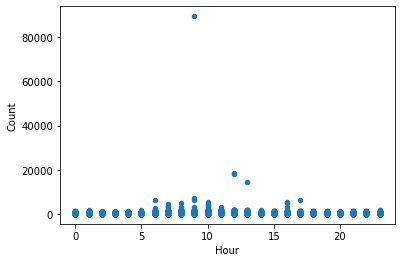

In [34]:
person2.plot.scatter(x = "Hour", y = "Count")


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

The scatterplot aboves shows various outliers which will have to be dealt with during data cleaning.

## Dealing with outliers
- Hourly values over 10 000 will be assumed an error and be transformed.

Checking the largest recordings for person 2

In [35]:
person2.nlargest(10, 'Count')


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
304448,Person2 Phone,2018-11-06,9,89434
305037,Person2 Phone,2018-11-25,12,18578
298648,Person2 Phone,2018-10-06,12,18099
298273,Person2 Phone,2018-10-01,13,14440
298006,Person2 Phone,2018-09-28,9,7084
301007,Person2 Phone,2018-10-22,6,6401
304578,Person2 Phone,2018-11-22,17,6224
299832,Person2 Phone,2018-10-15,9,6175
301221,Person2 Phone,2018-10-23,16,5367
298546,Person2 Phone,2018-10-06,10,5204


The above output shows 4 recordings with a count of over 10 000. 

We have decided to cap the maximum hourly step count limit at 10 000 steps.

- Health line puts the average running speed of a man between 20-40yrs running a 5km run at 5.9mph (9.5km/h). 
    - <https://www.healthline.com/health/how-fast-can-a-human-run#speed-comparison>


- The calculator site puts 10 000 steps in a 6mile run at 6mph. 
    - <https://www.thecalculatorsite.com/health/steps-miles.php>

Any recording over 10 000 made into a count of 0 as it is assumed to be a device error.

In [36]:
# Changing any values over 10 000 to 0
person2.loc[(person2.Count > 10000),"Count"] = 0  

# Checking the largest recorded values
person2.nlargest(10, 'Count')   


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Source,Date,Hour,Count
298006,Person2 Phone,2018-09-28,9,7084
301007,Person2 Phone,2018-10-22,6,6401
304578,Person2 Phone,2018-11-22,17,6224
299832,Person2 Phone,2018-10-15,9,6175
301221,Person2 Phone,2018-10-23,16,5367
298546,Person2 Phone,2018-10-06,10,5204
301292,Person2 Phone,2018-10-24,8,5009
298345,Person2 Phone,2018-10-03,16,4839
301564,Person2 Phone,2018-10-25,7,4648
300185,Person2 Phone,2018-10-17,10,4422


The above output shows that there is no longer any values over 10 000.

## Dealing with multiple sources

Identify different data sources and see how many values in each one.

In [37]:
person2["Source"].value_counts()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

Person2 Watch    310630
Person2 Phone    175629
Name: Source, dtype: int64

The above output shows that there are 2 different sources: 'Watch' and 'Phone'.

Each of these may have recordings during the same hour of the day, it is difficult to determine if there are overlapping readings or not.

- We have decided to only take the device with the highest summed hourly amount for each hour. 
    - This will eradicate overlap in recording sources, and minimise the amount of lost data as it is done hourly.
    - However, there is still the uncertainty present due to the removal of step data.

First, separate each of the data sources into their own dataframe with the 'Count' of the rows with the same 'Hour' and 'Date' summed.

In [38]:
## Watch
watch = person2.loc[person2['Source'].str.contains('Person2 Watch')]
watch = watch.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source watch
watch = watch.groupby(['Date','Hour'], as_index = False).sum()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

In [39]:
## Phone
phone = person2.loc[person2['Source'].str.contains('Person2 Phone')]
phone = phone.loc[:,['Date','Hour','Count']]

# Sum all values with the same date and hour for the source phone
phone = phone.groupby(['Date','Hour'], as_index = False).sum() 


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

Each source dataframe now only has a single count for each hour of each date.

Merge all the source dataframes into one dataframe based on 'Date' and 'Hour'.

In [40]:
person2_merge = watch.merge(phone, how='outer', on=['Date','Hour'], suffixes=('_phone','_watch'))
person2_merge.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_phone,Count_watch
0,2015-06-24,17,10.0,3070.0
1,2015-06-24,18,15.0,3431.0
2,2015-07-14,18,330.0,246.0
3,2015-07-14,19,81.0,43.0
4,2015-07-14,20,250.0,235.0


We now have a dataframe with individual rows for each 'Hour' of each 'Date' with columns for each source step count.


Now, create a new column 'Count' which takes the max count of the 5 sources for each hour. 
- Only the max count from each hour is taken in order to minimise overlap of device recordings.

In [41]:
# Fill any NaN as 0
person2_merge.fillna(0,inplace=True)   

# Take the maximum value of each row 
person2_merge['Count'] = person2_merge.max(axis=1)
person2_merge.sort_values(by=['Date','Hour']).head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_phone,Count_watch,Count
30664,2014-11-29,6,0.0,28.0,28.0
30665,2014-11-29,12,0.0,207.0,207.0
30666,2014-11-29,13,0.0,1621.0,1621.0
30667,2014-11-29,14,0.0,1045.0,1045.0
30668,2014-11-29,15,0.0,219.0,219.0


Check that the 'Count' column has only taken the larger value.

In [42]:
# Take rows where both iphone count and health mate count are above 0 to check the count column has only taken the max value of the two.
person2_merge[(person2_merge['Count_phone'] > 0) & (person2_merge['Count_watch'] > 0)].head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Mike Chen - Code taken from mini assignment wk 09

,Date,Hour,Count_phone,Count_watch,Count
0,2015-06-24,17,10.0,3070.0,3070.0
1,2015-06-24,18,15.0,3431.0,3431.0
2,2015-07-14,18,330.0,246.0,330.0
3,2015-07-14,19,81.0,43.0,81.0
4,2015-07-14,20,250.0,235.0,250.0


Check there are no overlaps/duplicates of hours in each day.

In [43]:
person2_duplicate = person2_merge[person2_merge.duplicated(subset=['Date','Hour'], keep=False)]
person2_duplicate


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Hour,Count_phone,Count_watch,Count


The output dateframe returned empty therefore there are no overlaps of 'Date' and 'Hour'.

## Find daily step count
- Daily step count can be used to show the activity of person 1 on a daily basis.

In [44]:
# Create new df with summed 'Count' values based on 'Date'.
person2_daily = person2_merge.groupby(['Date']).Count.sum().reset_index() 
person2_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count
0,2014-11-29,12464.0
1,2014-11-30,2759.0
2,2014-12-01,6672.0
3,2014-12-02,9658.0
4,2014-12-03,1720.0


We now have a dataframe with the dates and daily step count of person 2.

## Dealing with missing dates and 0 values.

- Missing values and 0 values will throw off the assessment of activity. Most likely, there are missing values or 0 values because the person did not wear any tracking device as opposed to having no steps. 
- We will need to find any missing dates and 0 values, and later on impute them with data.

Check for any 0 daily counts.

In [45]:
person2_daily[(person2_daily['Count'] == 0)]


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count


The output returned empty therefore there are no 0 values for the daily counts of person 2.

Find the first and last dates in the person 1 dataframe.

In [46]:
person2_daily['Date'].min()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

'2014-11-29'

In [47]:
person2_daily['Date'].max()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

'2021-09-22'

Check what dates are missing between '2014-11-29' and '2021-09-22'.

In [48]:
# Setting the Date as the index
person2_daily = person2_daily.set_index('Date')

# Formating to a date into a dateTime object
person2_daily.index = pd.to_datetime(person2_daily.index)
  
# Returning dates which are not in sequence
print(pd.date_range(
  start="2014-11-29", end="2021-09-22").difference(person2_daily.index))


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


The output returned None, therefore there are no missing dates.

Change the date from index back into a column.

In [49]:
person2_daily.reset_index(inplace=True)
person2_daily = person2_daily.rename(columns = {'index':'Date'})
person2_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count
0,2014-11-29,12464.0
1,2014-11-30,2759.0
2,2014-12-01,6672.0
3,2014-12-02,9658.0
4,2014-12-03,1720.0


## Classify data into weeks of the year
- We want to be able to perform later aggregations and calculations on the data where the data has been grouped into weeks.
- The datetime package uses real calender dates and so we will be able to classify for actual weeks. 

In [50]:
# reclassifing string/character column into a datetime column
person2_daily['WeekDate'] = person2_daily.apply(lambda row: row['Date'] - dt.timedelta(days=row['Date'].weekday()), axis=1)
person2_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong
# Supporters: Iliana Young - taken from mini assignment wk 09

,Date,Count,WeekDate
0,2014-11-29,12464.0,2014-11-24
1,2014-11-30,2759.0,2014-11-24
2,2014-12-01,6672.0,2014-12-01
3,2014-12-02,9658.0,2014-12-01
4,2014-12-03,1720.0,2014-12-01


The above code created a new column called WeekDate which indicates the starting Monday date of each new week. 

## Summing step count for each week

- Aggregations and calculations can be formed on the step count of each week.
- These weekly step counts will not sum any values for the missing dates as no value has been imputed for them yet.

In [51]:
person2_daily['WeekCount'] = person2_daily['Count'].groupby(person2_daily['WeekDate']).transform('sum')
person2_daily.head()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

,Date,Count,WeekDate,WeekCount
0,2014-11-29,12464.0,2014-11-24,15223.0
1,2014-11-30,2759.0,2014-11-24,15223.0
2,2014-12-01,6672.0,2014-12-01,38631.0
3,2014-12-02,9658.0,2014-12-01,38631.0
4,2014-12-03,1720.0,2014-12-01,38631.0


The above code created a new column called WeekCount which indicates the sum of the daily step counts for each week

## Copy to new dataframe

- This dataset now originally has no missing dates or 0 counts and therefore no missing values. The copy will be fully cleaned data.

In [52]:
person2_clean = person2_daily.copy()


# Date: 22.10.2021 - 22.10.2021
# Author: Angela Wong

# *Heat Map Visualisations*

## With NA value - visualisation

Fill any missing dates to be a value of 0.

In [53]:
#fill the na value with 0
person1_NaN.fillna(0,inplace=True)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

## Person 1 Missing value

### Calendar graph shows the missing date and the date that recorded as 0

In [54]:
#Find the data in 2019 and save Date and Count data into list
data1_na = person1_NaN.loc[person1_NaN['Date'].dt.year==2019,['Date','Count']].values.tolist()

#Build 2019 missing value calendar
c2019 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data1_na,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2019",
            #yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE missing value in 2019"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"min":-1 ,"max":0, "label": 'Mssing Value',"color":'Black'},{"min":1, "label": 'Normal Value',"color":'#41678D'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'
        ),
    )
)

#Find the data in 2020 and save Date and Count data into list
data1_na = person1_NaN.loc[person1_NaN['Date'].dt.year==2020,['Date','Count']].values.tolist()

#Build 2020 missing value calendar
c2020 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data1_na,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2020",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE missing value in 2020"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"min":-1 ,"max":0, "label": 'Mssing Value',"color":'Black'},{"min":1, "label": 'Normal Value',"color":'#41678D'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'
        ),
    )
)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [55]:
#Render two graph in one page
page = Page()
page.add(
    c2019,
    c2020,
)
page.render_notebook()

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [56]:
#Calculate missing value percentage in 2019 and 2020
proportion2019 = len(person1_NaN.loc[(person1_NaN['Date'].dt.year==2019) & (person1_NaN['Count'] == 0)].values) / len(person1_NaN.loc[(person1_NaN['Date'].dt.year==2019)].values)
proportion2020 = len(person1_NaN.loc[(person1_NaN['Date'].dt.year==2020) & (person1_NaN['Count'] == 0)].values) / len(person1_NaN.loc[(person1_NaN['Date'].dt.year==2020)].values)
print('Person ONE:')
print('The percentage of missing value in 2019 is {:.2%}'.format(proportion2019))
print('The percentage of missing value in 2020 is {:.2%}'.format(proportion2020))

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

Person ONE:
The percentage of missing value in 2019 is 2.74%
The percentage of missing value in 2020 is 8.20%


## Person 1 2019-2020 heatmap
- Heat map for Person 1 in 2019-2020 base on the every days' step count

In [57]:
# Find person1's data in 2019 and save Date and Count data into list
data = person1_clean.loc[person1_clean['Date'].dt.year==2019,['Date','Count']].values.tolist()

# Build person1 2019 step count heat map calendar
c2019 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2019",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE Step Count Heat Map in 2019"),
        visualmap_opts=opts.VisualMapOpts(
            max_=12500,
            min_=0,
            orient="horizontal",
            is_piecewise=False,
            pos_bottom = '30%',
            pos_left = 'center',
        ),
    )
)

# Find person1's data in 2020 and save Date and Count data into list
data = person1_clean.loc[person1_clean['Date'].dt.year==2020,['Date','Count']].values.tolist()

# Build person1 2020 step count heat map calendar
c2020 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2020",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE Step Count Heat Map in 2020"),
        visualmap_opts=opts.VisualMapOpts(
            max_=12500,
            min_=0,
            orient="horizontal",
            is_piecewise=False,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [58]:
# Render two calendar in one page
page = Page()
page.add(
    c2019,
    c2020,
)
page.render_notebook()

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

Compare to the colour distribution between 2019 and 2020. There is a significant difference between them. Person one shows more active in 2019.

## Person 2 2019-2020 heatmap
- Heat map for Person 2 in 2019-2020 base on the every days' step count

In [59]:
# Find person2's data in 2019 and save Date and Count data into list
data = person2_clean.loc[person2_clean['Date'].dt.year==2019,['Date','Count']].values.tolist()

# Build person2 2019 step count heat map calendar
c2019 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2019",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person TWO Step Count Heat Map in 2019"),
        visualmap_opts=opts.VisualMapOpts(
            max_=12500,
            min_=0,
            orient="horizontal",
            is_piecewise=False,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Find person2's data in 2019 and save Date and Count data into list
data = person2_clean.loc[person2_clean['Date'].dt.year==2020,['Date','Count']].values.tolist()

# Build person2 2020 step count heat map calendar
c2020 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2020",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person TWO Step Count Heat Map in 2020"),
        visualmap_opts=opts.VisualMapOpts(
            max_=12500,
            min_=0,
            orient="horizontal",
            is_piecewise=False,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [60]:
# Render two calendar in one page
page = Page()
page.add(
    c2019,
    c2020,
)
page.render_notebook()

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

Same as person one, person two shows a high motivation in 2019 across the whole year. After into 2020, the blueish side appears more during the mid 2020.

## Calendar with highligher for step > 10,000

### Person 1 with 2019-2020

In [67]:
# Find person1's data in 2019 and save Date and Count data into list
data = person1_clean.loc[person1_clean['Date'].dt.year==2019,['Date','Count']].values.tolist()

# Build person1 2019 highlighter active days' calendar
c2019 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2019",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE active days in 2019"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"max":10000, "label": 'NOT',"color":'#41678D'},{"min":10000, "label": 'Active',"color":'#D12929'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Find person1's data in 2020 and save Date and Count data into list
data = person1_clean.loc[person1_clean['Date'].dt.year==2020,['Date','Count']].values.tolist()

# Build person1 2020 highlighter active days' calendar
c2020 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2020",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person ONE active days in 2020"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"max":10000, "label": 'NOT',"color":'#41678D'},{"min":10000, "label": 'Active',"color":'#D12929'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [68]:
#Render two calendar in one page
page = Page()
page.add(
    c2019,
    c2020,
)
page.render_notebook()

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [69]:
# Proportion of active days(step>10,000) in 2019 and 2020
proportion2019 = len(person1_clean.loc[(person1_clean['Date'].dt.year==2019) & (person1_clean['Count'] >= 10000)].values) / len(person1_clean.loc[(person1_clean['Date'].dt.year==2019)].values)
proportion2020 = len(person1_clean.loc[(person1_clean['Date'].dt.year==2020) & (person1_clean['Count'] >= 10000)].values) / len(person1_clean.loc[(person1_clean['Date'].dt.year==2020)].values)
print('Person ONE:')
print('The percentage of active days in 2019 is {:.2%}'.format(proportion2019))
print('The percentage of active days in 2020 is {:.2%}'.format(proportion2020))

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

Person ONE:
The percentage of active days in 2019 is 21.92%
The percentage of active days in 2020 is 5.46%


### person 2 with 2019-2020

In [70]:
# Find person2's data in 2019 and save Date and Count data into list
data = person2_clean.loc[person2_clean['Date'].dt.year==2019,['Date','Count']].values.tolist()

# Build person2 2019 highlighter active days' calendar
c2019 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2019",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person TWO active days in 2019"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"max":10000, "label": 'NOT',"color":'#41678D'},{"min":10000, "label": 'Active',"color":'#D12929'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Find person2's data in 2020 and save Date and Count data into list
data = person2_clean.loc[person2_clean['Date'].dt.year==2020,['Date','Count']].values.tolist()

# Build person2 2020 highlighter active days' calendar
c2020 = (
    Calendar(init_opts=opts.InitOpts(width="800px", height="360px"))
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="20%",
            pos_left="30",
            pos_right="30",
            range_="2020",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="5%", pos_left="center", title="Person TWO active days in 2020"),
        visualmap_opts=opts.VisualMapOpts(
            pieces = [{"max":10000, "label": 'NOT',"color":'#41678D'},{"min":10000, "label": 'Active',"color":'#D12929'}],
            orient="horizontal",
            is_piecewise=True,
            pos_bottom = '30%',
            pos_left = 'center'

        ),
    )
)

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [71]:
#Render two calendar in one page
page = Page()
page.add(
    c2019,
    c2020,
)
page.render_notebook()

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

In [72]:
# Proportion of active days(step>10,000) in 2019 and 2020
proportion2019 = len(person2_clean.loc[(person2_clean['Date'].dt.year==2019) & (person2_clean['Count'] >= 10000)].values) / len(person2_clean.loc[(person2_clean['Date'].dt.year==2019)].values)
proportion2020 = len(person2_clean.loc[(person2_clean['Date'].dt.year==2020) & (person2_clean['Count'] >= 10000)].values) / len(person2_clean.loc[(person2_clean['Date'].dt.year==2020)].values)
print('Person TWO:')
print('The percentage of active days in 2019 is {:.2%}'.format(proportion2019))
print('The percentage of active days in 2020 is {:.2%}'.format(proportion2020))

# Date: 1.11.2021 - 1.11.2021
# Author: Mike Chen

Person TWO:
The percentage of active days in 2019 is 50.96%
The percentage of active days in 2020 is 19.13%


# *Bar charts Visualisations*

## Person 1

To get a new organized data frame which only has two columns that are WeekDate and WeekCount, pandas' group by function was used.

In [61]:
#The 2019 defined as from 2019/1/1 to 2019/12/31, 2020 is from 2020/1/1 to 2020/12/31
year2019 = person1_NaN[(pd.Timestamp(2019,1,1) <= person1_NaN['Date']) & (person1_NaN['Date'] <= pd.Timestamp(2019,12,31))]
year2020 = person1_NaN[(pd.Timestamp(2020,1,1) <= person1_NaN['Date']) & (person1_NaN['Date'] <= pd.Timestamp(2020,12,31))]

graph_data = year2019.groupby("WeekDate").agg({'WeekCount':'mean'})
graph_data = graph_data.reset_index(drop = False)

graph1_2020 = year2020.groupby("WeekDate").agg({'WeekCount':'mean'})
graph1_2020 = graph1_2020.reset_index(drop = False)
graph1_2020.head(5)

# Date: 11.10.2021 - 11.10.2021
# Author: Samuel Yuan

,WeekDate,WeekCount
0,2019-12-30,32072.0
1,2020-01-06,38678.0
2,2020-01-13,17151.0
3,2020-01-20,21269.0
4,2020-01-27,25195.0


By check the first 5 row data, the structure of new dataframe for 2019 is correct, and can be used to visualization.

To compare the data for 2019 and 2020, we used a parallel bar chart to reflect the difference in steps count between the two years and set a threshold of 35,000 to define active weeks. 

The colors used in the bar chart have taken care of various color-blind groups, and have passed most color-blindness tests to ensure that people with color-blindness can distinguish data from different years. Just in case, the shape of the column is also distinguished, round_rect stands for 2019, and rect stands for 2020.

The bar chart is as follows:

In [62]:
#The code is about the setting of the bar graph, such as color, title and lables.
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
bar.add_xaxis(graph_data.index.tolist())
bar.add_yaxis("2019 (Round_Rect)", graph_data['WeekCount'].tolist(),gap="0%", itemstyle_opts = { "barBorderRadius": [90, 90, 0, 0],})
bar.add_yaxis("2020 (Rect)", graph1_2020['WeekCount'].tolist(),gap="0%")
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="Weekly Steps Count: 2019 Vs 2020", subtitle="Person 1"),
    legend_opts = opts.LegendOpts(legend_icon = 'circle'),
    yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}/Week"),name= "Weekly steps"),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20),name= "n(th) Week"),
    )
bar.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(y=35000, name="Threshold")],
            linestyle_opts=opts.LineStyleOpts(width = 2,color = "#F75D59",type_ = 'dashed')
        ))
bar.render_notebook()

# Date: 21.10.2021 - 21.10.2021
# Author: Samuel Yuan

From the overall view of the figure, most of the data in 2019 are higher than 2020. In order to more accurately reflect which year has more steps, the following code counts how many active weeks there are in each year

In [63]:
#Set the threshold and get the number of active weeks.

threshold = 35000
p1_active_2019 = len(graph_data[graph_data['WeekCount'] > threshold])

p1_active_2020 = len(graph_data[graph1_2020['WeekCount'] > threshold])

print("For person1 in 2019, there were {} weeks that the step count exceeded the threshold".format(p1_active_2019))
print("For person1 in 2020, there were {} weeks that the step count exceeded the threshold".format(p1_active_2020))

# Date: 21.10.2021 - 21.10.2021
# Author: Samuel Yuan

For person1 in 2019, there were 35 weeks that the step count exceeded the threshold
For person1 in 2020, there were 7 weeks that the step count exceeded the threshold


So in conclusion for person 1, person 1 had **35** active weeks in 2019 and **7** active weeks in 2020, the percent of active weeks is **67.3%** for 2019 and **13.4%** for 2020, so this person is more active in 2019 than in 2020.

## Person 2

To get the data frame of 2019 and 2020 used to visualization for person 2, a new organized data frame which only has two columns that are WeekDate and WeekCount was created, using pandas' group by function.

In [64]:
#Using group by function to aggregate the data
p2_year2019 = person2_clean[(pd.Timestamp(2019,1,1) <= person2_clean['Date']) & (person2_clean['Date'] <= pd.Timestamp(2019,12,31))]
p2_year2020 = person2_clean[(pd.Timestamp(2020,1,1) <= person2_clean['Date']) & (person2_clean['Date'] <= pd.Timestamp(2020,12,31))]
graph2_2019 = p2_year2019.groupby("WeekDate").agg({'WeekCount':'mean'})
graph2_2019= graph2_2019.reset_index(drop = False)

graph2_2020 = p2_year2020.groupby("WeekDate").agg({'WeekCount':'mean'})
graph2_2020 = graph2_2020.reset_index(drop = False)
graph2_2020.head(5)

# Date: 21.10.2021 - 21.10.2021
# Author: Samuel Yuan

,WeekDate,WeekCount
0,2019-12-30,76354.0
1,2020-01-06,75432.0
2,2020-01-13,51657.0
3,2020-01-20,67528.0
4,2020-01-27,67451.0


The format of this bar graph is same as person1

In [65]:
#The code is about the setting of the bar graph, such as color, title and lables.
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
bar.add_xaxis(graph2_2019.index.tolist())
bar.add_yaxis("2019 (Round_Rect)",graph2_2019['WeekCount'].tolist(),gap="0%", itemstyle_opts = { "barBorderRadius": [90, 90, 0, 0],})
bar.add_yaxis("2020 (Rect)", graph2_2020['WeekCount'].tolist(),gap="0%")
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="Weekly Steps Count: 2019 Vs 2020", subtitle="Person2"),
    legend_opts = opts.LegendOpts(legend_icon = 'circle'),
    yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value}/Week"),name= "Weekly steps"),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-20),name= "n(th) Week"),
    )
bar.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(y=35000, name="Threshold")],
            linestyle_opts=opts.LineStyleOpts(width = 2,color = "#F75D59",type_ = 'dashed')
        ))
bar.render_notebook()

# Date: 21.10.2021 - 21.10.2021
# Author: Samuel Yuan

In this graph, although there are more weekly steps in 2019 than in 2020, it is not clear which year has more weeks exceeding the threshold, again, len () is used to count:

In [66]:
p2_active_2019 = len(graph_data[graph2_2019['WeekCount'] > threshold])

p2_active_2020 = len(graph_data[graph2_2020['WeekCount'] > threshold])

print("For person2 in 2019, there were {} weeks that the step count exceeded the threshold".format(p2_active_2019))
print("For person2 in 2020, there were {} weeks that the step count exceeded the threshold".format(p2_active_2020))

# Date: 21.10.2021 - 21.10.2021
# Author: Samuel Yuan

For person2 in 2019, there were 53 weeks that the step count exceeded the threshold
For person2 in 2020, there were 44 weeks that the step count exceeded the threshold


As a result, For person 2 in 2019, it shows that there were 53 active weeks, however there are only 52 weeks in a year. It may due to that there was a week start from 2018 (such as 31/12/2018) and end in the beginning of 2019, so one more week appear. But base on the fact, we decide that in 2019 there were 52 active weeks.

So overall, person 2 had **52** active weeks in 2019 and **44** active weeks in 2020, active percent were **100%** and **84.6%**,so person 2 was more active in 2019 than 2020.